In [67]:
SUPPORTED_SAMPLE_TYPES = [
    "normal",
    "H1",
    "H2",
    "H3",
    "H4",
    "H5",
    "H6",
    "F1",
    "F2",
    "F3",
    "F4",
    "F5",
]
from matplotlib import pyplot as plt
import numpy as np




def draw(matrix):
    plt.figure(figsize=(4, 4), dpi=150)
    plt.imshow(matrix, cmap="Greens")
    # 显示数字
    for i in range(len(SUPPORTED_SAMPLE_TYPES)):
        for j in range(len(SUPPORTED_SAMPLE_TYPES)):
            color='green' if matrix[i,j] < 50 else 'white'
            plt.text(
                j,
                i,
                "{}".format(int(matrix[i, j])),
                ha="center",
                va="center",
                color=color,
                fontsize=7,
            )
    #plt.colorbar()
    plt.xticks(range(len(SUPPORTED_SAMPLE_TYPES)), SUPPORTED_SAMPLE_TYPES)
    ax = plt.gca()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.yticks(range(len(SUPPORTED_SAMPLE_TYPES)), SUPPORTED_SAMPLE_TYPES)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    #plt.show()


In [11]:
import random


count = {}
for _ in range(2000):
    t = random.choice(SUPPORTED_SAMPLE_TYPES)
    if t not in count:
        count[t] = 1
    else:
        count[t]+=1
print(count)



{'normal': 157, 'H5': 164, 'H4': 167, 'H2': 172, 'F3': 172, 'H6': 166, 'F2': 167, 'F5': 190, 'F1': 166, 'H1': 154, 'H3': 164, 'F4': 161}


In [12]:


def calculate_metrics(conf_matrix):
    # 计算每个类别的指标
    class_accuracy = np.diag(conf_matrix) / conf_matrix.sum(axis=1)
    class_precision = np.diag(conf_matrix) / conf_matrix.sum(axis=0)
    class_recall = np.diag(conf_matrix) / conf_matrix.sum(axis=1)
    class_f1_score = 2 * (class_precision * class_recall) / (class_precision + class_recall)
    
    # 计算宏平均和微平均指标
    macro_accuracy = np.mean(class_accuracy)
    macro_precision = np.nanmean(class_precision)  # nanmean 处理除数为零的情况
    macro_recall = np.mean(class_recall)
    macro_f1_score = np.nanmean(class_f1_score)  # nanmean 处理除数为零的情况

    # 计算混淆矩阵的假正率
    false_positive_rate = (conf_matrix.sum(axis=0) - np.diag(conf_matrix)) / conf_matrix.sum(axis=0)


    return macro_accuracy, macro_precision, macro_recall, macro_f1_score, np.nanmean(false_positive_rate)



mlp

In [ ]:
T = {
    'normal': 190, 'H1': 184, 'H6': 158, 'H2': 170, 'H3': 167,'H4': 160,'H5': 156,
    'F1': 164, 'F2': 155,'F3': 164, 'F4': 165, 'F5': 167, 
}
assert sum(T.values())==2000


matrix = np.zeros((len(SUPPORTED_SAMPLE_TYPES), len(SUPPORTED_SAMPLE_TYPES)))
for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    for j in range(len(SUPPORTED_SAMPLE_TYPES)):
        if i == j:
            continue
        #0.1的概率
        if random.random() < 0.5:
            matrix[i][j] = random.randint(0, 3)
        if random.random() < 0.1:
            matrix[i][j] = random.randint(0, 25)

#主对角线
for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    name = SUPPORTED_SAMPLE_TYPES[i]
    nums = T[name]
    matrix[i][i] = nums - sum(matrix[i])

import pickle

with open("./mlp.pkl","wb") as f:
    pickle.dump(matrix,f)

matrix = np.array(matrix)
draw(matrix)
# 用这个matrix 算 Accu	Prec	Recall	F1	FPR
calculate_metrics(matrix)


ae

In [6]:
T = {
    'normal': 190, 'H1': 184, 'H6': 158, 'H2': 170, 'H3': 167,'H4': 160,'H5': 156,
    'F1': 164, 'F2': 155,'F3': 164, 'F4': 165, 'F5': 167, 
}

matrix = [
    [0.19, 0.0, 0.2, 0.19, 0.21, 0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0.05],
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.21, 0.0, 0.17, 0.2, 0.17, 0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0.08],
    [0.19, 0.0, 0.19, 0.21, 0.19, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.04],
    [0.2, 0.0, 0.18, 0.14, 0.27, 0.0, 0.13, 0.0, 0.0, 0.0, 0.0, 0.07],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.16, 0.0, 0.15, 0.17, 0.15, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.16],
    [0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.57, 0.0, 0.0, 0.43, 0.0],
    [0.1, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.11, 0.09, 0.07, 0.07],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.14, 0.0, 0.11, 0.16, 0.12, 0.0, 0.21, 0.0, 0.0, 0.0, 0.0, 0.24],
]

for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    summ = 0
    for j in range(len(SUPPORTED_SAMPLE_TYPES)):
        if i == j:
            continue
        t = matrix[i][j]/2
        matrix[i][j] -= t
        summ += t
    matrix[i][i]+=summ

for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    assert sum(matrix[i])

for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    for j in range(len(SUPPORTED_SAMPLE_TYPES)):
        name = SUPPORTED_SAMPLE_TYPES[i]
        matrix[i][j]*= T[name]

import pickle

with open("./ae.pkl","wb") as f:
    pickle.dump(matrix,f)

matrix = np.array(matrix)
draw(matrix)
# 用这个matrix 算 Accu	Prec	Recall	F1	FPR
calculate_metrics(matrix)

tcn

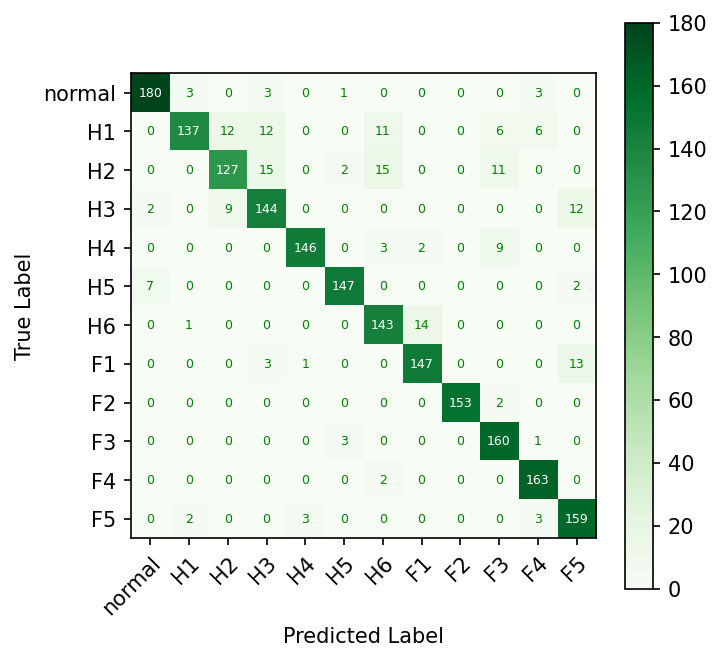

(0.9050134570408203,
 0.9059938718318395,
 0.9050134570408203,
 0.9030932617929749,
 0.09400612816816055)

In [17]:
T = {
    'normal': 190, 'H1': 184, 'H6': 158, 'H2': 170, 'H3': 167,'H4': 160,'H5': 156,
    'F1': 164, 'F2': 155,'F3': 164, 'F4': 165, 'F5': 167, 
}
assert sum(T.values())==2000


matrix = np.zeros((len(SUPPORTED_SAMPLE_TYPES), len(SUPPORTED_SAMPLE_TYPES)))
for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    for j in range(len(SUPPORTED_SAMPLE_TYPES)):
        if i == j:
            continue
        #0.1的概率
        if random.random() < 0.2:
            matrix[i][j] = random.randint(0, 3)
        if random.random() < 0.1:
            matrix[i][j] = random.randint(0, 15)

#主对角线
for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    name = SUPPORTED_SAMPLE_TYPES[i]
    nums = T[name]
    matrix[i][i] = nums - sum(matrix[i])

import pickle

with open("./tcn.pkl","wb") as f:
    pickle.dump(matrix,f)

matrix = np.array(matrix)
draw(matrix)
# 用这个matrix 算 Accu	Prec	Recall	F1	FPR
calculate_metrics(matrix)

fusion

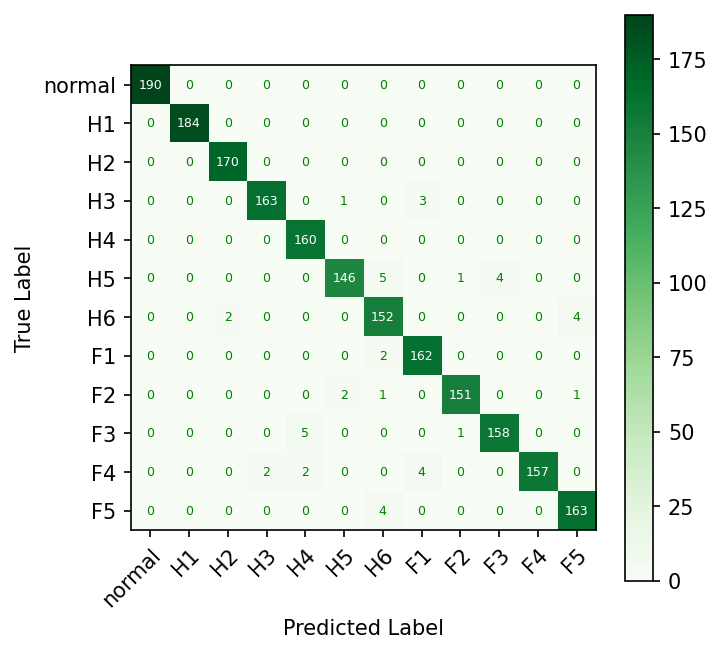

(0.9772455644028114,
 0.977673706398959,
 0.9772455644028114,
 0.9772713893823809,
 0.02232629360104096)

In [41]:
T = {
    'normal': 190, 'H1': 184, 'H6': 158, 'H2': 170, 'H3': 167,'H4': 160,'H5': 156,
    'F1': 164, 'F2': 155,'F3': 164, 'F4': 165, 'F5': 167, 
}
assert sum(T.values())==2000


matrix = np.zeros((len(SUPPORTED_SAMPLE_TYPES), len(SUPPORTED_SAMPLE_TYPES)))
for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    for j in range(len(SUPPORTED_SAMPLE_TYPES)):
        if i == j:
            continue
        #0.1的概率
        if random.random() < 0.1:
            matrix[i][j] = random.randint(0, 5)
        if random.random() < 0.001:
            matrix[i][j] = random.randint(0, 10)

#主对角线
for i in range(len(SUPPORTED_SAMPLE_TYPES)):
    name = SUPPORTED_SAMPLE_TYPES[i]
    nums = T[name]
    matrix[i][i] = nums - sum(matrix[i])

import pickle

with open("./fusion.pkl","wb") as f:
    pickle.dump(matrix,f)

matrix = np.array(matrix)
draw(matrix)
# 用这个matrix 算 Accu	Prec	Recall	F1	FPR
calculate_metrics(matrix)

(0.9772455644028114,
 0.977673706398959,
 0.9772455644028114,
 0.9772713893823809,
 0.02232629360104096)

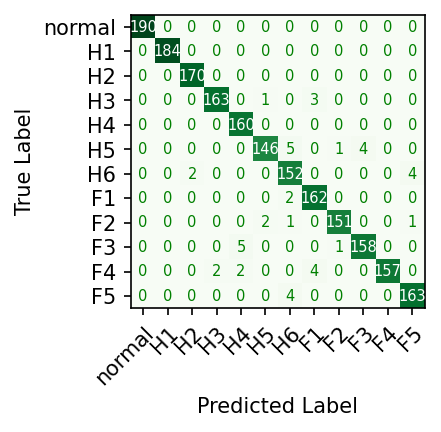

In [68]:
import pickle

matrix = None
name = "fusion"
with open(f"./{name}.pkl","rb") as f:
    matrix = pickle.load(f)

matrix = np.array(matrix)
draw(matrix)
plt.savefig(f"./{name}.png")
# 用这个matrix 算 Accu	Prec	Recall	F1	FPR
calculate_metrics(matrix)